# Problem Statement:
- With the surge in demand for online food orders following the introduction of platforms like Swiggy and Zomato, food delivery companies aim to optimize their delivery processes. One key challenge they face is predicting customer orders accurately to streamline delivery operations and enhance customer satisfaction.
  
## Objective:
- The primary objective for food delivery companies is to deliver food at the right time. Achieving this objective involves:
- Identifying high-demand areas where online food orders are frequent.
- Allocating more delivery partners (drivers) to these high-demand areas.
- Ensuring timely delivery to customers in those locations.

## Constraints:
- Here are some constraints to consider:
- Accuracy Requirement: The food order prediction system must achieve a high level of accuracy to effectively anticipate customer orders and minimize delivery delays.- 
Resource Allocation: Allocating additional delivery partners to high-demand areas should be balanced to optimize delivery efficiency without overburdening specific locations
- 
Data Privacy: Ensuring the security and privacy of customer data used in the prediction system is paramount to maintain customer trust and comp y with data protection regulation
- .
Cost Efficiency: Implementing and maintaining the food order prediction system and increasing delivery resources should be done in a cost-effective manner to ensure profitability for the companieinvolvesns.


# load the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import emoji
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer,LancasterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay,recall_score,precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
# Set the maximum number of columns displayed to None (display all columns)
pd.set_option('display.max_columns', None)

import numpy as np
import pandas as pd
import re
import emoji 
from textblob import TextBlob 
from warnings import filterwarnings
filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer,LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("onlinedeliverydata.csv", usecols =["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             "Family size","latitude", "longitude", "Pin code","Output", "Reviews"])
df

Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post Graduate            3   12.9551    77.6593    560017   
3                     Graduate            6   12.9473    77.5616    560019   
4                Post Graduate            4   12.9850    77.5533    560010   
..                         ...          ...       ...        ...       ...   
383              Post Graduate            2   12.9766    77.5993    560001   
384              Post Graduate            4   12.9854    77.7081    560048   
385              Post Graduate            5   12.9850    77.5533    560010   
386              Post Graduate            2   12.9770    77.5773    560009   
387              Post Graduate            5   12.8988    77.5764    560078   

    Output                                            Reviews  
0      Yes                                              Nil\n  
1      Yes                                                Nil  
2      Yes  Many a times payment gateways are an issue, so...  
3      Yes                                                nil  
4      Yes                                                NIL  
..     ...                                                ...  
383    Yes                                                Nil  
384    Yes                                                Nil  
385    Yes                                                Nil  
386    Yes  Language barrier is also one major issue. Mosl...  
387    Yes                                                Nil  

[388 rows x 12 columns]

In [3]:
df.head(2)

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   

  Output Reviews  
0    Yes   Nil\n  
1    Yes     Nil

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Reviews                     387 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


### The dataset I'll use contains these information:

- the age of the client
- marital status of the client
- occupation of the client
- monthly income of the client
- educational qualification of the client
- family size of the client
- latitude and longitude of the location of the client
- pin code of the residence of the client
- did the client order again (Output)
- remarks on the most recent order (Positive or Negative)
- Review

In [5]:
#df = df[["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             #"Family size","latitude", "longitude", "Pin code","Output", "Reviews"]]

In [6]:
df

Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post Graduate            3   12.9551    77.6593    560017   
3                     Graduate            6   12.9473    77.5616    560019   
4                Post Graduate            4   12.9850    77.5533    560010   
..                         ...          ...       ...        ...       ...   
383              Post Graduate            2   12.9766    77.5993    560001   
384              Post Graduate            4   12.9854    77.7081    560048   
385              Post Graduate            5   12.9850    77.5533    560010   
386              Post Graduate            2   12.9770    77.5773    560009   
387              Post Graduate            5   12.8988    77.5764    560078   

    Output                                            Reviews  
0      Yes                                              Nil\n  
1      Yes                                                Nil  
2      Yes  Many a times payment gateways are an issue, so...  
3      Yes                                                nil  
4      Yes                                                NIL  
..     ...                                                ...  
383    Yes                                                Nil  
384    Yes                                                Nil  
385    Yes                                                Nil  
386    Yes  Language barrier is also one major issue. Mosl...  
387    Yes                                                Nil  

[388 rows x 12 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Reviews                     387 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [8]:
df.tail()

Age  Gender Marital Status Occupation  Monthly Income  \
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
383              Post Graduate            2   12.9766    77.5993    560001   
384              Post Graduate            4   12.9854    77.7081    560048   
385              Post Graduate            5   12.9850    77.5533    560010   
386              Post Graduate            2   12.9770    77.5773    560009   
387              Post Graduate            5   12.8988    77.5764    560078   

    Output                                            Reviews  
383    Yes                                                Nil  
384    Yes                                                Nil  
385    Yes                                                Nil  
386    Yes  Language barrier is also one major issue. Mosl...  
387    Yes                                                Nil

In [9]:
df.describe().T

count           mean        std          min            25%  \
Age          388.0      24.628866   2.975593      18.0000      23.000000   
Family size  388.0       3.280928   1.351025       1.0000       2.000000   
latitude     388.0      12.972058   0.044489      12.8652      12.936900   
longitude    388.0      77.600160   0.051354      77.4842      77.565275   
Pin code     388.0  560040.113402  31.399609  560001.0000  560010.750000   

                     50%            75%          max  
Age              24.0000      26.000000      33.0000  
Family size       3.0000       4.000000       6.0000  
latitude         12.9770      12.997025      13.1020  
longitude        77.5921      77.630900      77.7582  
Pin code     560033.5000  560068.000000  560109.0000

In [10]:
### finding the anomolities in data
for i in df.columns:
    print('*'*20,i,'*'*20)
    print(df[i].unique())

******************** Age ********************
[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
******************** Gender ********************
['Female' 'Male']
******************** Marital Status ********************
['Single' 'Married' 'Prefer not to say']
******************** Occupation ********************
['Student' 'Employee' 'Self Employeed' 'House wife']
******************** Monthly Income ********************
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
******************** Educational Qualifications ********************
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
******************** Family size ********************
[4 3 6 2 5 1]
******************** latitude ********************
[12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0158 12

## Data Vizualization

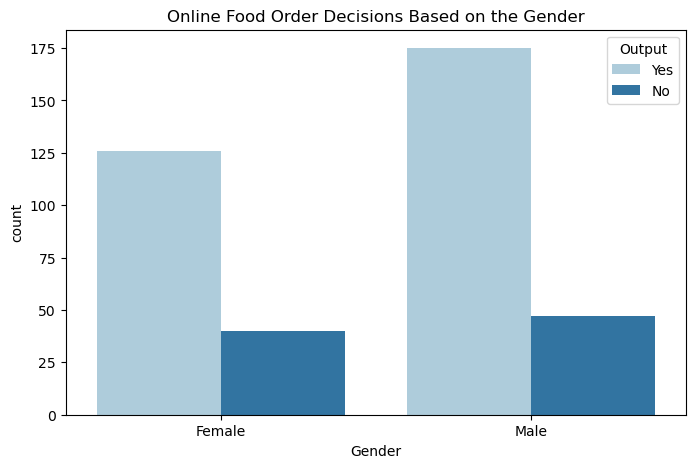

In [11]:
plt.figure(figsize=(8,5))
plt.title("Online Food Order Decisions Based on the Gender")
sns.countplot(x='Gender',data=df,hue='Output',palette="Paired");

### From the above plot we can see that most of the user who order online are male.The number of male customer in the data is slightly higher than the number of female customer.

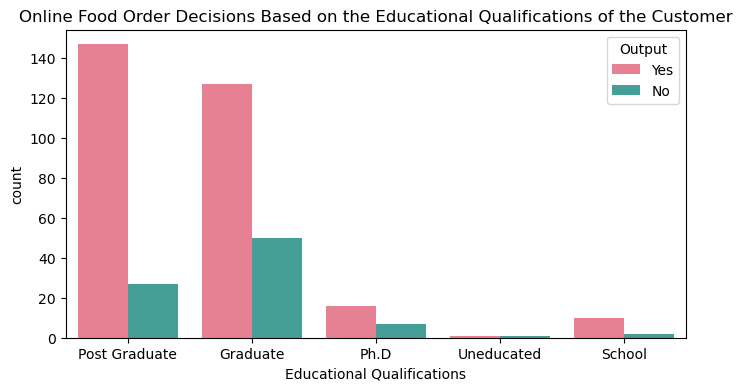

In [12]:
plt.figure(figsize=(8,4))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=df,hue='Output',palette="husl");

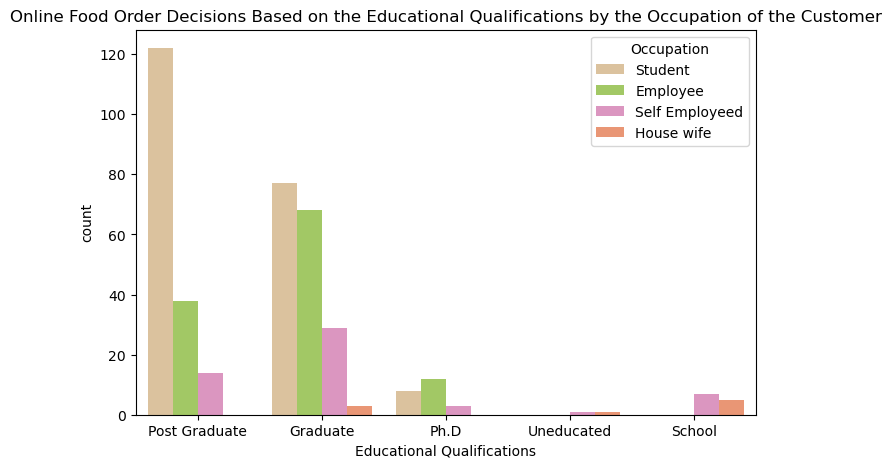

In [13]:
plt.figure(figsize=(8,5))
plt.title("Online Food Order Decisions Based on the Educational Qualifications by the Occupation of the Customer")
sns.countplot(x='Educational Qualifications',data=df,hue='Occupation',palette="Set2_r");

### The vast majority of students who place orders are pursuing a master's degree. The majority of graduates are either students or employees. In this case, the first priority of companies should be students.

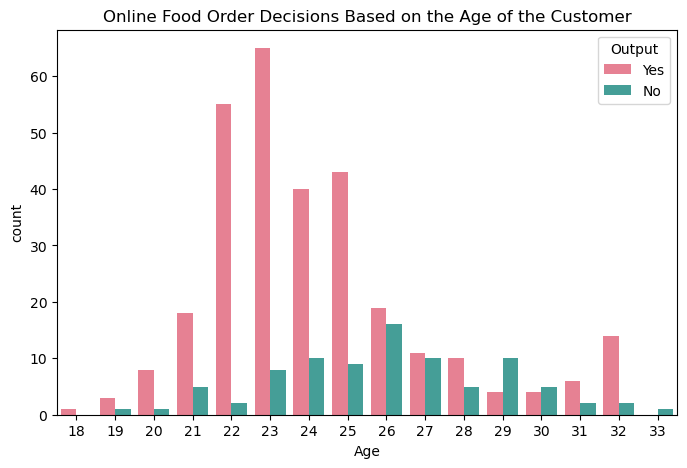

In [14]:
plt.figure(figsize=(8,5))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.countplot(x='Age',data=df,hue='Output',palette="husl");

### While the Output is 'Yes' in the 22-25 age range, the Output is mostly 'No' for 29-year-old users. This indicates that online food delivery companies specifically target these age groups(22-25 age range).

<Axes: title={'center': 'Online Food Order Decisions Based on the size of the family'}, xlabel='Family size', ylabel='count'>

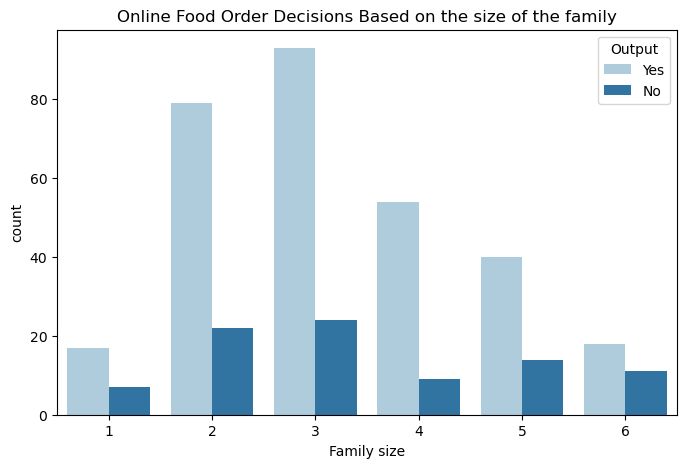

In [15]:
plt.figure(figsize=(8,5))
plt.title("Online Food Order Decisions Based on the size of the family")
sns.countplot(x='Family size',data=df,hue='Output',palette="Paired")

### Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

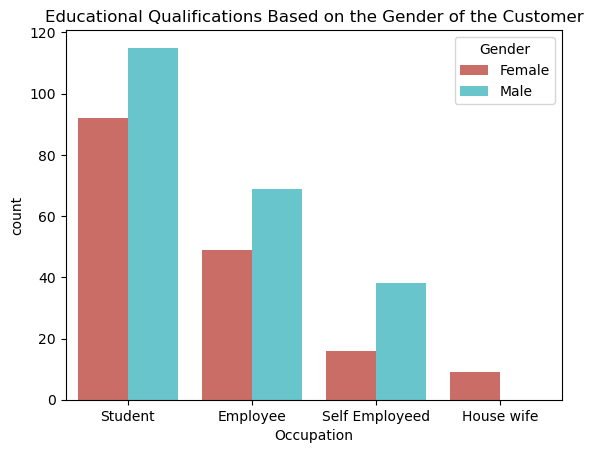

In [16]:
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Occupation',data=df,hue='Gender',palette="hls");

### The number of male students is higher than the number of female students. There may be many reasons for this. The main reason may be gender roles supported by social norms.

In [17]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

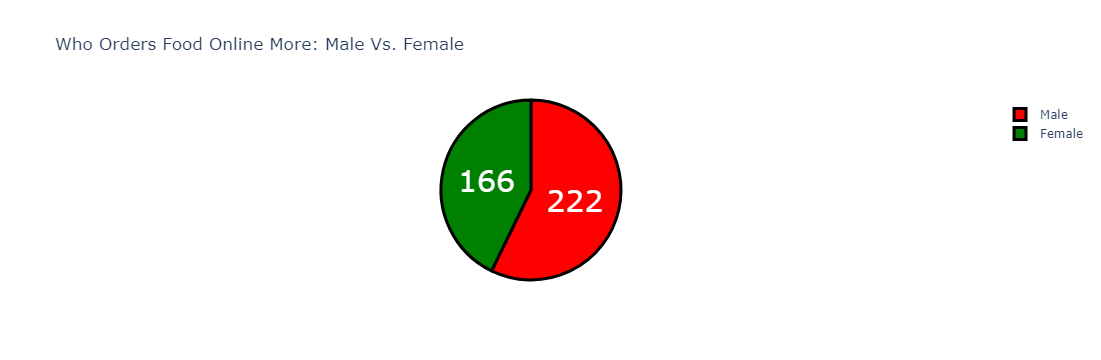

In [18]:
gender = df["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['red','green']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### According to the dataset, male customers are ordering more compared the females. Now let’s have a look at the marital status of the customers who ordered again:

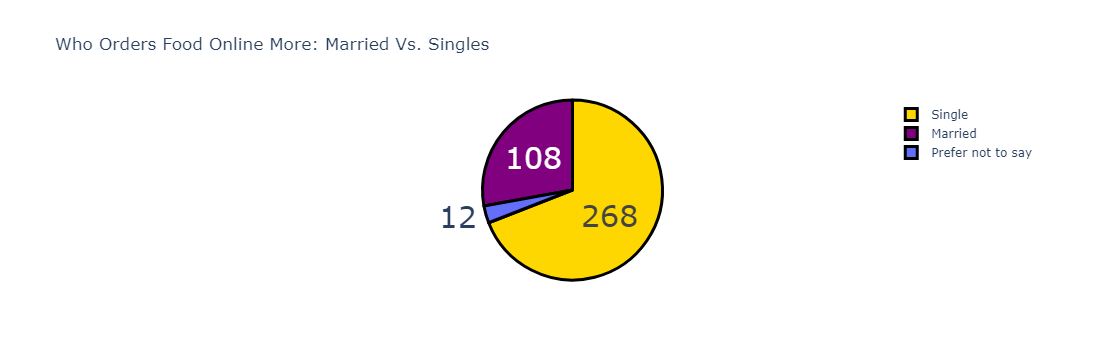

In [19]:
marital = df["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','purple']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### According to the above figure, 69 % of the frequent customers are singles. Now let’s have a look at what’s the income group of the customers who ordered the food again

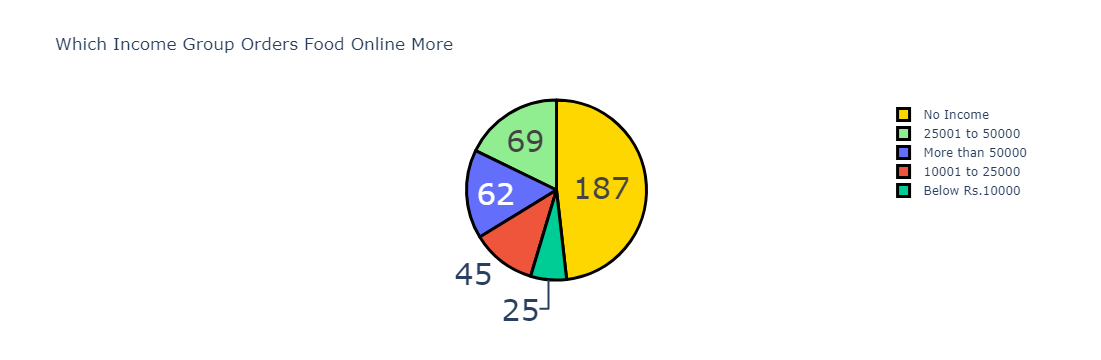

In [20]:
income = df["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### According to the above figure, 48% of the customers don’t fall under any income group. They can be housewives or students. 

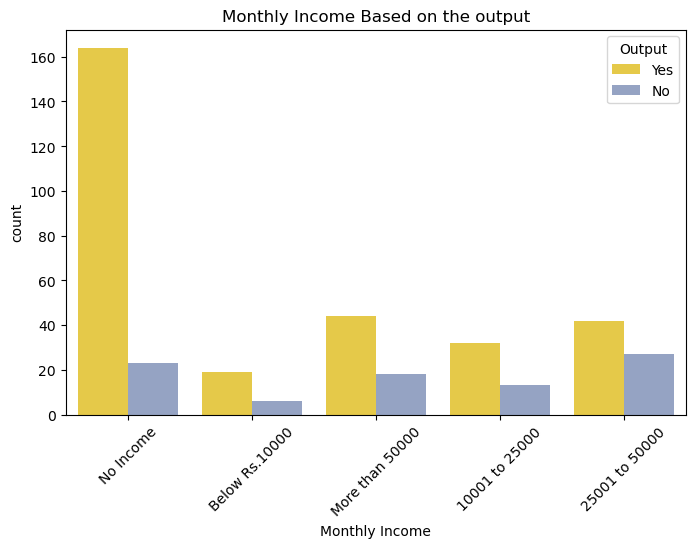

In [21]:
plt.figure(figsize=(8,5))
plt.title("Monthly Income Based on the output")
sns.countplot(x='Monthly Income',data=df,hue='Output',palette="Set2_r");
plt.xticks(rotation=45)
plt.show()

### We see that those with no income have a higher rate of reordering compared to not placing an order. The main reason for this may be that the majority of the customers are students and have no income.

# Data Preprocessing

In [22]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Reviews                       1
dtype: int64

### Removing duplicates

In [23]:
df.duplicated().sum()

104

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.describe().T

count           mean        std          min          25%  \
Age          284.0      24.661972   3.023786      18.0000      23.0000   
Family size  284.0       3.267606   1.355087       1.0000       2.0000   
latitude     284.0      12.973243   0.043576      12.8652      12.9438   
longitude    284.0      77.597165   0.053679      77.4842      77.5633   
Pin code     284.0  560036.746479  30.745378  560001.0000  560010.0000   

                      50%          75%          max  
Age              24.00000      26.0000      33.0000  
Family size       3.00000       4.0000       6.0000  
latitude         12.97700      12.9980      13.1020  
longitude        77.58705      77.6227      77.7582  
Pin code     560027.00000  560064.5000  560109.0000

### Dropping Null values

In [27]:
df['Reviews'].isnull().sum()

1

In [28]:
df.dropna(subset=['Reviews'], inplace=True)


In [29]:
df['Reviews'].isnull().sum()

0

In [30]:
df["Reviews"].replace({'nil': 'N/A', 'NIL': 'N/A', 'Nil\n': 'N/A', 'Nil': 'N/A', 'nil\n': 'N/A', 'Nil ': 'N/A', 'nil ': 'N/A', 'N0': 'N/A', 'nan': 'N/A', 'Nill': 'N/A', 'No': 'N/A', 'NiL':'N/A'}, inplace=True)


In [31]:
df['Reviews'].unique()

array(['N/A',
       'Many a times payment gateways are an issue, so getting the refund and the surcharges are an inconvenience',
       'Language barrier is also one major issue. Moslty these delivery boys are only familiar with Kanada which creates a problem while addressing any issue.',
       'Spillage, bad packaging and missing items ',
       "Once my order from kfc got exchanged with someone else. Fault was delivery boy's. ",
       'I feel Swiggy has a good interface for users and the delivery time to my place in Bangalore taken by Swiggy is less than Zomato when ordered from same restaurant ',
       'I expect faster delivery in my area',
       'Now days delivery ?? is improved a lot like fast delivery ,but now corna time many people are hesitating to order ',
       'I love zomato but it requires quality in deliver service. ',
       'Prefer hygienic delivery people', '-',
       'I have normally had good experiences with swiggy especially for payments and refunds',
       '

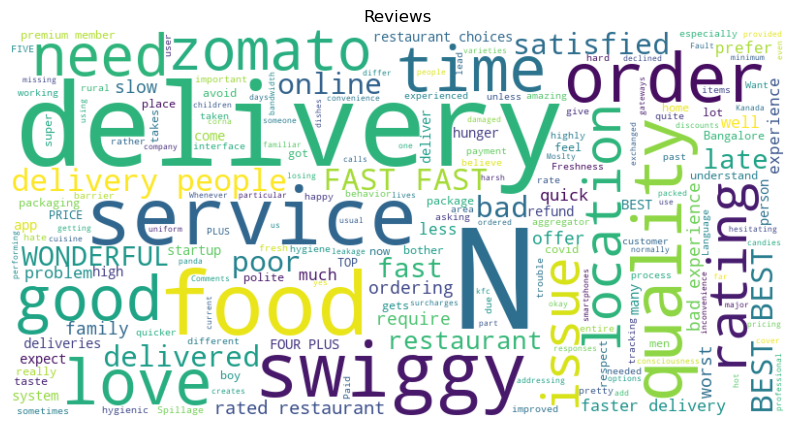

In [32]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Reviews'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reviews')
plt.show()

In [33]:
def eda(df, column):
    count = 0
    count = df[column].apply(lambda x: count + emoji.emoji_count(x)).sum()  # emoji count in th data
    lower = df[column].str.islower().sum()
    url = df[column].apply(lambda x: True if re.search(r'www.\S+ | https?://\S+', x) else False).sum()
    tags =  df[column].apply(lambda x: True if re.search(r'<[^>]+>', x) else False).sum()
    punc = df[column].apply(lambda x: True if re.search(r'[^A-z ]+', x) else False).sum()
    nums = df[column].apply(lambda x: True if re.search(r'[0-9]', x) else False).sum()
    return  pd.Series({'Emoji':count, "lower case":lower, "urls":url, "HTML tags":tags, "punctuation":punc, "Numbers":nums})


In [34]:
eda(df,'Reviews')

Emoji            0
lower case       2
urls             0
HTML tags        0
punctuation    196
Numbers          3
dtype: int64

### Removing punctuation

In [35]:
# Applying lambda function to remove punctuation from the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'[\.,''\']+',' ', x))

### Removing numbers

In [36]:
# Applying lambda function to remove numbers from the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'\d+', '', x))

### Converting to lowercase

In [37]:
# converting into lower case
df['Reviews'] = df['Reviews'].str.lower()

### Removing special characters

In [38]:
# Remove specific characters from the 'Reviews' column using pandas' replace function
df['Reviews'] = df['Reviews'].str.replace('!','').str.replace('-','')

In [39]:
df['Reviews'].unique()

array(['n/a',
       'many a times payment gateways are an issue  so getting the refund and the surcharges are an inconvenience',
       'language barrier is also one major issue  moslty these delivery boys are only familiar with kanada which creates a problem while addressing any issue ',
       'spillage  bad packaging and missing items ',
       'once my order from kfc got exchanged with someone else  fault was delivery boy s  ',
       'i feel swiggy has a good interface for users and the delivery time to my place in bangalore taken by swiggy is less than zomato when ordered from same restaurant ',
       'i expect faster delivery in my area',
       'now days delivery ?? is improved a lot like fast delivery  but now corna time many people are hesitating to order ',
       'i love zomato but it requires quality in deliver service  ',
       'prefer hygienic delivery people', '',
       'i have normally had good experiences with swiggy especially for payments and refunds',
       'g

### Tokenization

In [40]:
# Tokenize the text in the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(lambda x:" ".join(word_tokenize(x)))


### Removing the Stopwords

In [41]:
stopwords = stopwords.words('english')

def remove_stopwords(text):
    tokens = word_tokenize(text)

    filtered_tokens = [word for word in tokens if word.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text
df['Reviews'] = df['Reviews'].apply(remove_stopwords)

In [42]:
df['Reviews']

0                                                    n/a
1                                                    n/a
2      many times payment gateways issue getting refu...
3                                                    n/a
4                                                    n/a
                             ...                        
299                               rather cook home covid
321    best best best wonderful wonderful fast fast fast
342          times bad experienced aggregator restaurant
363    best best best wonderful wonderful fast fast fast
369                           entire family loves swiggy
Name: Reviews, Length: 283, dtype: object

### Text Normalization

In [43]:
stemmer = PorterStemmer()

In [44]:
def stemmer_function(text):
    stemmed_words = [stemmer.stem(word) for word in text.split()]
    return " ".join(stemmed_words)

df['Reviews'] = df['Reviews'].apply(stemmer_function)


In [45]:
df['Reviews']

0                                                    n/a
1                                                    n/a
2      mani time payment gateway issu get refund surc...
3                                                    n/a
4                                                    n/a
                             ...                        
299                               rather cook home covid
321          best best best wonder wonder fast fast fast
342                    time bad experienc aggreg restaur
363          best best best wonder wonder fast fast fast
369                             entir famili love swiggi
Name: Reviews, Length: 283, dtype: object

### Label encoding

In [46]:
encoder = LabelEncoder() # to encode string to the values like 0,1

In [47]:
feature_Label_encoder = ['Gender','Output']
for column in feature_Label_encoder:
    df[column] = encoder.fit_transform(df[column])

In [48]:
df.head(3)

Age  Gender Marital Status Occupation  Monthly Income  \
0   20       0         Single    Student       No Income   
1   24       0         Single    Student  Below Rs.10000   
2   22       1         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   

   Output                                            Reviews  
0       1                                                n/a  
1       1                                                n/a  
2       1  mani time payment gateway issu get refund surc...

In [49]:
df['Marital Status'].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

### Mapping

In [50]:
df["Marital Status"] = df["Marital Status"].map({"Single": 1,"Married": 2, "Prefer not to say": 0})

df["Occupation"] = df["Occupation"].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
                                             
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2,  "Ph.D": 3, "School": 4, "Uneducated": 5})
                                                                             
                                                                            
                                                                             

In [51]:
df

Age  Gender  Marital Status  Occupation   Monthly Income  \
0     20       0               1           1        No Income   
1     24       0               1           1   Below Rs.10000   
2     22       1               1           1   Below Rs.10000   
3     22       0               1           1        No Income   
4     22       1               1           1   Below Rs.10000   
..   ...     ...             ...         ...              ...   
299   25       0               1           2  More than 50000   
321   21       1               2           2  More than 50000   
342   22       1               2           3   10001 to 25000   
363   31       1               2           2  More than 50000   
369   30       1               2           2  More than 50000   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                             2            4   12.9766    77.5993    560001   
1                             1            3   12.9770    77.5773    560009   
2                             2            3   12.9551    77.6593    560017   
3                             1            6   12.9473    77.5616    560019   
4                             2            4   12.9850    77.5533    560010   
..                          ...          ...       ...        ...       ...   
299                           2            6   13.0140    77.5658    560012   
321                           3            3   12.9306    77.5434    560085   
342                           4            3   12.9820    77.6256    560008   
363                           3            3   12.9306    77.5434    560085   
369                           2            6   12.9369    77.6407    560095   

     Output                                            Reviews  
0         1                                                n/a  
1         1                                                n/a  
2         1  mani time payment gateway issu get refund surc...  
3         1                                                n/a  
4         1                                                n/a  
..      ...                                                ...  
299       0                             rather cook home covid  
321       1        best best best wonder wonder fast fast fast  
342       1                  time bad experienc aggreg restaur  
363       1        best best best wonder wonder fast fast fast  
369       1                           entir famili love swiggi  

[283 rows x 12 columns]

In [52]:
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, 
                                                 "25001 to 50000": 5000, 
                                                 "More than 50000": 7000, 
                                                 "10001 to 25000": 25000, 
                                                 "Below Rs.10000": 10000})

In [53]:
df.head(2)

Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   

   Output Reviews  
0       1     n/a  
1       1     n/a

### Numerical Feature Extraction

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


In [55]:
vector= vectorizer.fit_transform(df['Reviews']).toarray()

In [56]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

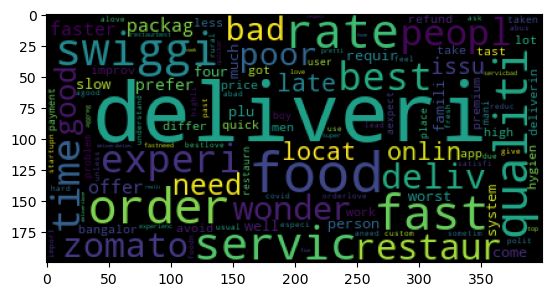

In [57]:
text = "".join(df['Reviews'].values.tolist())
data=WordCloud().generate(text)
plt.imshow(data)

In [58]:
#df1['polarity'] = df1['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)

In [59]:
SA = SentimentIntensityAnalyzer()

In [60]:
def polarity(x):
    return SA.polarity_scores(x)['compound']

In [61]:
df["Feedback"] = df['Reviews'].apply(polarity)

In [62]:
def sentiment(x):
    if x > 0.1:
        return 'Positive'

    else:
        return 'Negative'

In [63]:
df["Feedback"] = df["Feedback"].apply(sentiment)

In [64]:
df["Feedback"]

0      Negative
1      Negative
2      Negative
3      Negative
4      Negative
         ...   
299    Negative
321    Positive
342    Negative
363    Positive
369    Positive
Name: Feedback, Length: 283, dtype: object

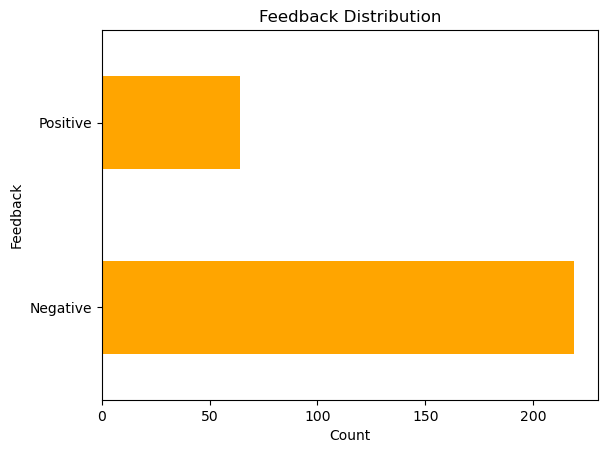

In [65]:
df["Feedback"].value_counts().plot(kind='barh', color='orange')  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Feedback')
plt.title('Feedback Distribution')
plt.show()

In [66]:
df["Feedback"].value_counts()

Feedback
Negative    219
Positive     64
Name: count, dtype: int64

In [67]:
df['Response'] = df["Feedback"].map({"Negative": 0, "Positive": 1})

In [68]:
df

Age  Gender  Marital Status  Occupation  Monthly Income  \
0     20       0               1           1               0   
1     24       0               1           1           10000   
2     22       1               1           1           10000   
3     22       0               1           1               0   
4     22       1               1           1           10000   
..   ...     ...             ...         ...             ...   
299   25       0               1           2            7000   
321   21       1               2           2            7000   
342   22       1               2           3           25000   
363   31       1               2           2            7000   
369   30       1               2           2            7000   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                             2            4   12.9766    77.5993    560001   
1                             1            3   12.9770    77.5773    560009   
2                             2            3   12.9551    77.6593    560017   
3                             1            6   12.9473    77.5616    560019   
4                             2            4   12.9850    77.5533    560010   
..                          ...          ...       ...        ...       ...   
299                           2            6   13.0140    77.5658    560012   
321                           3            3   12.9306    77.5434    560085   
342                           4            3   12.9820    77.6256    560008   
363                           3            3   12.9306    77.5434    560085   
369                           2            6   12.9369    77.6407    560095   

     Output                                            Reviews  Feedback  \
0         1                                                n/a  Negative   
1         1                                                n/a  Negative   
2         1  mani time payment gateway issu get refund surc...  Negative   
3         1                                                n/a  Negative   
4         1                                                n/a  Negative   
..      ...                                                ...       ...   
299       0                             rather cook home covid  Negative   
321       1        best best best wonder wonder fast fast fast  Positive   
342       1                  time bad experienc aggreg restaur  Negative   
363       1        best best best wonder wonder fast fast fast  Positive   
369       1                           entir famili love swiggi  Positive   

     Response  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
299         0  
321         1  
342         0  
363         1  
369         1  

[283 rows x 14 columns]

In [69]:
#df['Reviews'] = df['Reviews'].replace('n/a', '')


In [70]:
df

Age  Gender  Marital Status  Occupation  Monthly Income  \
0     20       0               1           1               0   
1     24       0               1           1           10000   
2     22       1               1           1           10000   
3     22       0               1           1               0   
4     22       1               1           1           10000   
..   ...     ...             ...         ...             ...   
299   25       0               1           2            7000   
321   21       1               2           2            7000   
342   22       1               2           3           25000   
363   31       1               2           2            7000   
369   30       1               2           2            7000   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                             2            4   12.9766    77.5993    560001   
1                             1            3   12.9770    77.5773    560009   
2                             2            3   12.9551    77.6593    560017   
3                             1            6   12.9473    77.5616    560019   
4                             2            4   12.9850    77.5533    560010   
..                          ...          ...       ...        ...       ...   
299                           2            6   13.0140    77.5658    560012   
321                           3            3   12.9306    77.5434    560085   
342                           4            3   12.9820    77.6256    560008   
363                           3            3   12.9306    77.5434    560085   
369                           2            6   12.9369    77.6407    560095   

     Output                                            Reviews  Feedback  \
0         1                                                n/a  Negative   
1         1                                                n/a  Negative   
2         1  mani time payment gateway issu get refund surc...  Negative   
3         1                                                n/a  Negative   
4         1                                                n/a  Negative   
..      ...                                                ...       ...   
299       0                             rather cook home covid  Negative   
321       1        best best best wonder wonder fast fast fast  Positive   
342       1                  time bad experienc aggreg restaur  Negative   
363       1        best best best wonder wonder fast fast fast  Positive   
369       1                           entir famili love swiggi  Positive   

     Response  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
299         0  
321         1  
342         0  
363         1  
369         1  

[283 rows x 14 columns]

In [71]:
df['Reviews']

0                                                    n/a
1                                                    n/a
2      mani time payment gateway issu get refund surc...
3                                                    n/a
4                                                    n/a
                             ...                        
299                               rather cook home covid
321          best best best wonder wonder fast fast fast
342                    time bad experienc aggreg restaur
363          best best best wonder wonder fast fast fast
369                             entir famili love swiggi
Name: Reviews, Length: 283, dtype: object

### Creatinge a new DataFrame

In [72]:
# Creating a new DataFrame with specified columns and renaming them
data = df[["Age", "Gender", "Marital Status", "Occupation", "Monthly Income", "Educational Qualifications", "Family size", "Pin code", "Output", "Response"]].copy()
data.columns = ["Age", "Gender", "Marital_Status", "Occupation", "Monthly_Income", "Educational_Qualifications", "Family_size", "Pin_code", "Output", "Response"]


In [73]:
data

Age  Gender  Marital_Status  Occupation  Monthly_Income  \
0     20       0               1           1               0   
1     24       0               1           1           10000   
2     22       1               1           1           10000   
3     22       0               1           1               0   
4     22       1               1           1           10000   
..   ...     ...             ...         ...             ...   
299   25       0               1           2            7000   
321   21       1               2           2            7000   
342   22       1               2           3           25000   
363   31       1               2           2            7000   
369   30       1               2           2            7000   

     Educational_Qualifications  Family_size  Pin_code  Output  Response  
0                             2            4    560001       1         0  
1                             1            3    560009       1         0  
2                             2            3    560017       1         0  
3                             1            6    560019       1         0  
4                             2            4    560010       1         0  
..                          ...          ...       ...     ...       ...  
299                           2            6    560012       0         0  
321                           3            3    560085       1         1  
342                           4            3    560008       1         0  
363                           3            3    560085       1         1  
369                           2            6    560095       1         1  

[283 rows x 10 columns]

### Identify Input and Output

In [74]:
X = data.drop(["Output"],axis =1)
y = data["Output"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, stratify = y)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 9), (57, 9), (226,), (57,))

### Step 4: Feature selection

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

selector = SelectKBest(score_func=f_classif, k=9)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [78]:
pd.DataFrame(selector.fit_transform(X,y), columns = selector.get_feature_names_out())

Age  Gender  Marital_Status  Occupation  Monthly_Income  \
0     20       0               1           1               0   
1     24       0               1           1           10000   
2     22       1               1           1           10000   
3     22       0               1           1               0   
4     22       1               1           1           10000   
..   ...     ...             ...         ...             ...   
278   25       0               1           2            7000   
279   21       1               2           2            7000   
280   22       1               2           3           25000   
281   31       1               2           2            7000   
282   30       1               2           2            7000   

     Educational_Qualifications  Family_size  Pin_code  Response  
0                             2            4    560001         0  
1                             1            3    560009         0  
2                             2            3    560017         0  
3                             1            6    560019         0  
4                             2            4    560010         0  
..                          ...          ...       ...       ...  
278                           2            6    560012         0  
279                           3            3    560085         1  
280                           4            3    560008         0  
281                           3            3    560085         1  
282                           2            6    560095         1  

[283 rows x 9 columns]

## Model Training

### KNN classifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=10)

In [80]:
y_pred = knn.predict(X_test_selected)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 80.70%
Precision: 85.11%
Recall: 90.91%
F1-score: 87.91%


In [82]:
### Grid search
from sklearn.model_selection import GridSearchCV

In [83]:
params = {'n_neighbors': range (2,40),
          'weights':['uniform', 'distance']
         }

In [84]:
grid_knn = GridSearchCV(knn,params, scoring='accuracy',cv=5,verbose=2)

In [85]:
grid_knn.fit(X_train_selected, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [86]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [87]:
grid_knn.best_params_

{'n_neighbors': 11, 'weights': 'uniform'}

In [88]:
KNN = KNeighborsClassifier(n_neighbors=11, weights= 'uniform')

In [89]:
KNN.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=11)

In [90]:
KNN_pred = KNN.predict(X_test_selected)
accuracy_score(y_test,KNN_pred)

0.8070175438596491

In [91]:
print(knn.score(X_train_selected,y_train))

0.7831858407079646


              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.85      0.91      0.88        44

    accuracy                           0.81        57
   macro avg       0.73      0.69      0.70        57
weighted avg       0.79      0.81      0.80        57



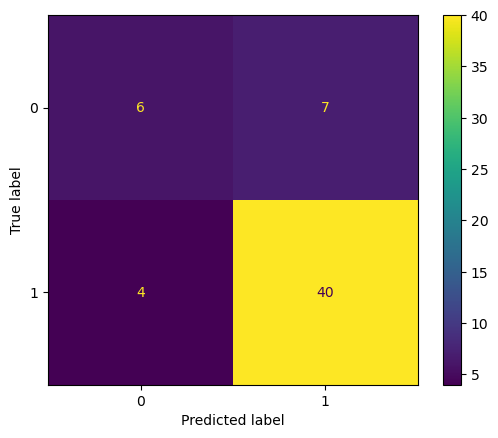

In [92]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

### GaussianNB

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
GNB = GaussianNB()
GNB.fit(X_train_selected, y_train)

GaussianNB()

In [95]:
y_pred = GNB.predict(X_test_selected)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 75.44%
Precision: 80.00%
Recall: 90.91%
F1-score: 85.11%


In [97]:
print(GNB.score(X_train_selected,y_train))

0.7831858407079646


              precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.80      0.91      0.85        44

    accuracy                           0.75        57
   macro avg       0.61      0.57      0.58        57
weighted avg       0.72      0.75      0.73        57



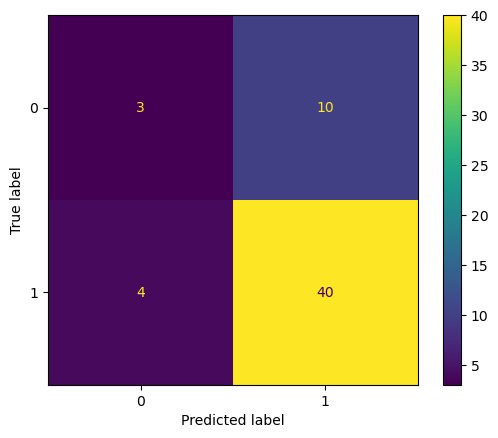

In [98]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

### Logisitic regression

In [99]:
lr = LogisticRegression()
lr.fit(X_train_selected,y_train)

LogisticRegression()

In [100]:
y_pred = lr.predict(X_test_selected)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 77.19%
Precision: 79.25%
Recall: 95.45%
F1-score: 86.60%


In [102]:
print(lr.score(X_train_selected,y_train))

0.7566371681415929


              precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.79      0.95      0.87        44

    accuracy                           0.77        57
   macro avg       0.65      0.55      0.55        57
weighted avg       0.73      0.77      0.72        57



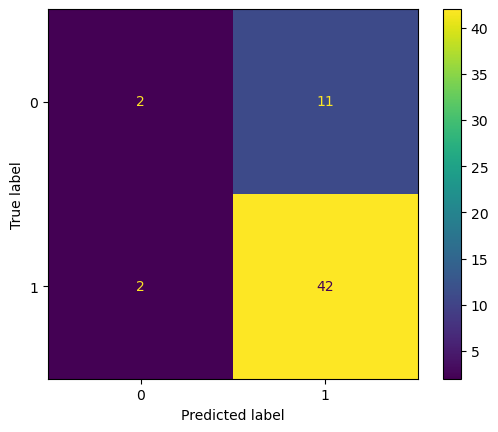

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

### GradientBoosting

In [104]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [105]:
Gb = GradientBoostingClassifier()
Gb.fit(X_train_selected,y_train)

GradientBoostingClassifier()

In [106]:
y_pred = Gb.predict(X_test_selected)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 80.70%
Precision: 86.67%
Recall: 88.64%
F1-score: 87.64%


In [108]:
print(Gb.score(X_train_selected,y_train))

0.9601769911504425


              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.87      0.89      0.88        44

    accuracy                           0.81        57
   macro avg       0.73      0.71      0.72        57
weighted avg       0.80      0.81      0.80        57



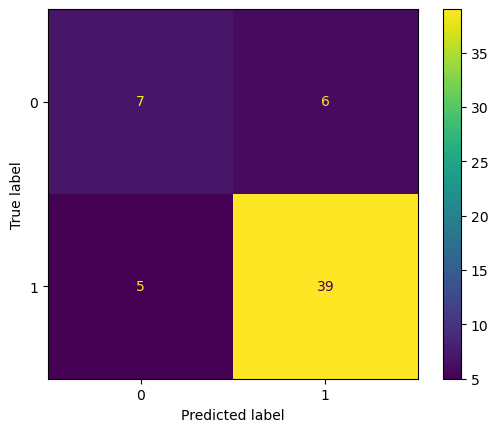

In [109]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

### Random Forest

In [110]:
Rf = RandomForestClassifier(n_estimators=100)
Rf.fit(X_train_selected,y_train)

RandomForestClassifier()

In [111]:
y_pred = Rf.predict(X_test_selected)

In [112]:
y_pred_tr = Rf.predict(X_train_selected)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 78.95%
Precision: 83.33%
Recall: 90.91%
F1-score: 86.96%


In [114]:
print(Rf.score(X_train_selected,y_train))

0.995575221238938


              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.83      0.91      0.87        44

    accuracy                           0.79        57
   macro avg       0.69      0.65      0.66        57
weighted avg       0.77      0.79      0.77        57



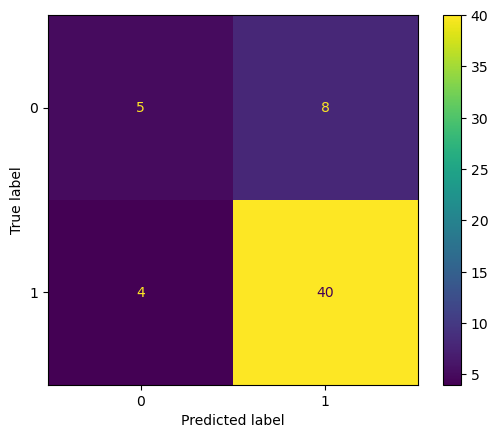

In [115]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

## Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt= DecisionTreeClassifier()
dt.fit(X_train_selected,y_train)

DecisionTreeClassifier()

In [118]:
y_pred = dt.predict(X_test_selected)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 77.19%
Precision: 89.74%
Recall: 79.55%
F1-score: 84.34%


In [120]:
print(dt.score(X_train_selected,y_train))

0.995575221238938


              precision    recall  f1-score   support

           0       0.50      0.69      0.58        13
           1       0.90      0.80      0.84        44

    accuracy                           0.77        57
   macro avg       0.70      0.74      0.71        57
weighted avg       0.81      0.77      0.78        57



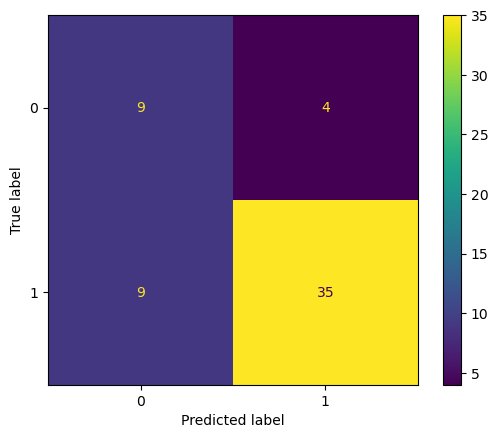

In [121]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

## SVM

In [122]:
from sklearn import svm

In [123]:
svc = svm.SVC()
svc.fit(X_train_selected,y_train)

SVC()

In [124]:
y_pred = svc.predict(X_test_selected)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 77.19%
Precision: 77.19%
Recall: 100.00%
F1-score: 87.13%


In [126]:
print(dt.score(X_train_selected,y_train))

0.995575221238938


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.77      1.00      0.87        44

    accuracy                           0.77        57
   macro avg       0.39      0.50      0.44        57
weighted avg       0.60      0.77      0.67        57



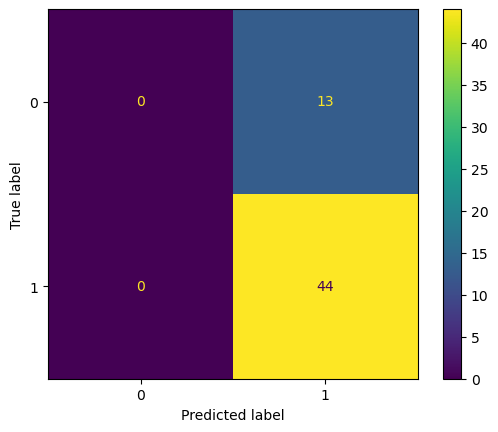

In [127]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

print(classification_report(y_test,y_pred))

### Creating pickle file

In [128]:
import pickle

In [129]:
#pickle.dump(knn,open("food_order_pred.pkl",'wb'))

In [130]:
#pickle.dump(knn,open("food_order_pred_knn.pkl",'wb'))

In [131]:
#pickle.dump(lr,open("food_order_pred_log.pkl",'wb'))

In [132]:
# Title("Online Food Order Prediction") 
# subheader("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h,i]])
prediction = knn.predict(features)
prediction_mapping = {0: "No", 1: "Yes"}
predicted_result = prediction_mapping[prediction[0]]
print("Finding if the customer will order again:", predicted_result)


Enter the Age of the Customer:  25
Enter the Gender of the Customer (1 = Male, 0 = Female):  1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed):  1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4):  2
Monthly Income:  35000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5):  1
Family Size:  1
Pin Code:  560051
Review of the Last Order (1 = Positive, 0 = Negative):  1


Finding if the customer will order again: Yes
